# Pre-requisites

## Install Python 3.12.

Recommended ways to install Python 3.12 are using a version manager like:

- **[uv](https://docs.astral.sh/uv/):** It is also a package manager like npm, and faster than pip or poetry. Recommended.
- **[mise](https://mise.jdx.dev/getting-started.html):** Supports other languages as well.

Once uv is installed, you can install Python 3.12 using the following command:

```bash
uv python install 3.12
```

## Start a UV project

Using uv you can use it to manage your project dependencies as well. First you create a new project:

```bash
uv init
```

This add a pyproject.toml file, similar to a package.json file in a Node.js project. Better than manually maintaining a requirements.txt file.

## Create a virtual environment

You can create a virtual environment using the following command:

```bash
uv venv # this prints out how to activate the virtual environment
source .venv/bin/activate[.fish] # activate the virtual environment
```

A virtual environment is a self-contained directory tree that contains a Python installation for a particular version of Python, plus all your dependencies.

## Jupyter Notebook

Now, finally, we can install our first dependency, Jupyter Notebook:

```bash
uv add jupyter
```

Jupyter is a great tool for experimentation and learning. [VS Code extension](https://code.visualstudio.com/docs/datascience/jupyter-notebooks) is also available for Jupyter.

A nice talk about why an interactive environment like Jupyter is important: [Literate Programming](https://www.youtube.com/watch?v=rX1yGxJijsI)


## Launch VS Code:

```bash
code .
```

VS Code will begin inside the virtual environment, with access to libraries installed in it.

## Let's start learning about ["How to teach new things to an AI"](https://docs.google.com/presentation/d/1so8_4HOEu9WsowwXYrVafhxLB4A3pM36uaWsg34PQCQ/edit#slide=id.g3029596e088_0_352)

## And jump into the data preparation -> text extraction part:

PyMuPDF is a fast text extraction library for python, it is open source with an AGPL 3.0 license. Other alternatives you should look at are:

- [docling](https://github.com/DS4SD/docling) from IBM.
- [GOT-OCR2.0](https://github.com/Ucas-HaoranWei/GOT-OCR2.0) from a Chinese university. Nice [description from Merve](https://x.com/mervenoyann/status/1843278355749065084).
- [MoondreamAI](https://github.com/vikhyat/moondream) plus PyMuPDF image extraction to add captions to images.

We need to add our second dependency, [PyMuPDF4LLM](https://pymupdf.readthedocs.io/en/latest/pymupdf4llm/):

```bash
uv add pymupdf4llm
```

---

By the way, parsing HTML has the same problem. How do you extract content ignoring navigation, footers, headers, ads? With [small language models](https://jina.ai/news/reader-lm-small-language-models-for-cleaning-and-converting-html-to-markdown/)?

In [8]:
import pymupdf4llm

document_paths = [
    "./docs/RRS-2021-2024-Final.pdf",
    "./docs/RRS-2025-2028-Final.pdf"
]

documents = []

for doc_path in document_paths:
    documents.append(pymupdf4llm.to_markdown(
        doc_path ,
        write_images=True,
        image_path="./images",
    ))
print(documents)

Processing ./docs/RRS-2021-2024-Final.pdf...
[                                        ] (0/15[                                        ] (  1/15[                                        ] (  2/15[                                        ] (  3/158[=                                       ] (  4/158[=                                       ] (  5/158[=                                       ] (  6/158[=                                       ] (  7/15[==                                      ] (  8/15[==                                      ] (  9/15[==                                      ] ( 10/15[==                                      ] ( 11/158[===                                     ] ( 12/1[===                                     ] ( 13/1[===                                     ] ( 14/1[===                                     ] ( 15/15[====                                    ] ( 16/15[====                                    ] ( 17/15[====                                    ] ( 18/15[====

# Chunking

For 2 main reasons:
- When we have more than what fits in my LLM context length. Remember to use the [ruler](https://github.com/NVIDIA/RULER).
- When we want reliable citations and sources for our answers.

...we need to chunk the extracted text into smaller parts. We can use the following code to do that.

And to chunk, it is good to use a tokenizer library. Recommended further readings:
- [You Should Probably Pay Attention to Tokenizers](https://cybernetist.com/2024/10/21/you-should-probably-pay-attention-to-tokenizers/)
- [Chunking Strategies for LLM Applications](https://www.pinecone.io/learn/chunking-strategies/)
- [Chunking for RAG: best practices](https://unstructured.io/blog/chunking-for-rag-best-practices)

To do chunking, we need to properly size the chunks. We need to know:

- The embedding model we are using, and it's context length. [MTEB leaderboard](https://huggingface.co/spaces/mteb/leaderboard) is a good place to start.
- The tokenizer the model uses, usually from the model page, like [nomic's embed 1.5](https://huggingface.co/nomic-ai/nomic-embed-text-v1.5).

We also have a new dependencies:

```bash
uv add tokenizers
```

In [2]:
from tokenizers import Tokenizer

tokenizer = Tokenizer.from_pretrained("bert-base-uncased")

## Semantic text splitting

A combination of text splitting and tokenization can be used to split text into semantically meaningful units.

Two fast libraries for this are:

- [Semantic text splitter](https://github.com/benbrandt/text-splitter)
- [SemChunk](https://github.com/umarbutler/semchunk)
- In the future... [use small models](https://jina.ai/news/finding-optimal-breakpoints-in-long-documents-using-small-language-models)?

New dependencies:

```bash
uv add semchunk
# IMPORTANT! Remember to check the official docs and pypi to know the actual package name
uv add semantic-text-splitter
```

In [9]:
from semantic_text_splitter import MarkdownSplitter

splitter = MarkdownSplitter.from_huggingface_tokenizer(tokenizer, 512)
# loop
md_chunks = []

for count, doc in enumerate(documents):
  md_chunks.append(splitter.chunks(doc))
  print(len(md_chunks[count]))
md_chunks

146
149


[['![](./images/RRS-2021-2024-Final.pdf-0-0.png)\n\n###### 2021 - 2024',
  '## Racing Rules of Sailing\n\n\n-----',
  '#### RACE SIGNALS \n\n###### The meanings of visual and sound signals are stated below. An arrow pointing up or down  ( \xad ¯ ) means that a visual signal is displayed or removed. A dot ( ) means a sound; five short •\n dashes (– – – – –) mean repetitive sounds; a long dash (—) means a long sound. When a visual signal is displayed over a class flag, fleet flag, event flag or race area flag, the signal applies only to that class, fleet, event or race area. \n\n Postponement Signals\n\n\n![](./images/RRS-2021-2024-Final.pdf-1-5.png)\n\n###### AP  Races not started are postponed. The warning signal will be made 1 minute after removal unless at that time the race is postponed again or abandoned.\n\n\n![](./images/RRS-2021-2024-Final.pdf-1-1.png)\n\n###### AP over H Races not started are postponed.  Further signals ashore.\n\n\n![](./images/RRS-2021-2024-Final.pdf-1-1.png)

In [10]:
from semchunk import semchunk

chunker = semchunk.chunkerify(tokenizer, 512)

tk_chunks = []

for count, doc in enumerate(documents):
  tk_chunks = chunker(doc)
  print(len(tk_chunks[count]))
tk_chunks

1471
1081


['# The Racing Rules of Sailing\n\n## 2025-2028\n\n\n-----\n\n### RACE SIGNALS \n\n###### The meanings of visual and sound signals are stated below. An arrow pointing up or down  ( \uf0ad\uf0af ) means that a visual signal is displayed or removed. A dot ( \uf0b7 ) means a sound; five short dashes (– – – – –) mean repetitive sounds; a long dash (—) means a long sound. When a visual signal is displayed over a class flag, fleet flag, event flag or race area flag, the signal applies only to that class, fleet, event or race area. \n\n Postponement Signals\n\n\n![](./images/RRS-2025-2028-Final.pdf-1-4.png)\n\n###### AP  Races not started are postponed. The warning signal will be made 1 minute after removal unless at that time the race is postponed again or abandoned.\n\n\n![](./images/RRS-2025-2028-Final.pdf-1-0.png)\n\n###### AP over H Races not started are postponed.  Further signals ashore.\n\n\n![](./images/RRS-2025-2028-Final.pdf-1-0.png)\n\n###### AP over A  Races not started are postp

## Embeddings models

And finally! We can use the embeddings model to get the embeddings of the chunks. We can use the following code to do that.

```bash
uv add sentence-transformers
```

Remember to **read the official model page** carefully to know how to use it, any special instructions, context length, etc.

Oh, and always read error messages carefully. They are there to help you. I forgot to add:

```bash
uv add einops
```

And first run will always be longer because it needs to download the model weights.

![Error message](./sentence-transformers-error.png)

In [13]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("nomic-ai/nomic-embed-text-v1.5", trust_remote_code=True)

<All keys matched successfully>


In [15]:
# append `search_document: ` to the beginning of each chunk before passing to model.encode
embeddings = []
for count, chunks in enumerate(md_chunks):
  nomic_doc_chunks = [f"search_document: {chunk}" for chunk in chunks]
  embeddings.append(model.encode(nomic_doc_chunks))
embeddings

[array([[ 0.535171  ,  0.32430524, -2.9880757 , ..., -1.0437005 ,
         -1.2637177 , -0.6450531 ],
        [ 0.08635391,  2.0557213 , -2.8306022 , ..., -0.54306257,
         -1.7149228 , -0.93837917],
        [-0.01344855,  0.24892397, -3.8936458 , ..., -0.88470125,
         -1.722188  , -0.93605953],
        ...,
        [ 0.14553848, -1.0590694 , -4.0076127 , ..., -1.137245  ,
         -1.2660867 , -0.9978654 ],
        [ 1.2871414 ,  1.8933662 , -3.349996  , ..., -0.8847469 ,
         -1.0706586 , -1.1928135 ],
        [ 0.96597016,  1.2092998 , -3.5061142 , ..., -0.7477207 ,
         -1.0593371 , -0.64576274]], dtype=float32),
 array([[-1.10189116e-03,  2.07655430e+00, -3.15331912e+00, ...,
         -5.06061256e-01, -1.59795320e+00, -1.01998854e+00],
        [-4.14020717e-01,  1.19639516e-01, -2.25366306e+00, ...,
         -1.36927152e+00, -1.40842295e+00, -1.76250708e+00],
        [ 1.70599192e-01,  2.63871163e-01, -3.81221843e+00, ...,
         -1.05239844e+00, -1.56922996e+00

## Vector database

We can use a vector database to store the embeddings of the chunks.
And the database will also help us to search for similar chunks.

Recommended vector databases are:

- Postgres with [pgvector](https://github.com/pgvector/pgvector)
- SQLite with [vector search](https://github.com/asg017/sqlite-vec)
- [DuckDB](https://duckdb.org/why_duckdb), easiest to use for [vector search](https://duckdb.org/2024/05/03/vector-similarity-search-vss.html).

```bash
uv add duckdb
brew install duckdb
```

You can explore any of those databases using [DBeaver](https://dbeaver.io/).

In [25]:
import duckdb

# db = duckdb.connect(':memory:')
# in-memory database, try changing to a file path and using duckdb command line or DBeaver to explore the database.
db = duckdb.connect('./db/ror.db')

In [26]:
db.execute('drop table if exists docs;') # Try removing this line and re-running the cell.
db.execute('''
    create table docs (
        document_path string,
        idx integer,
        text string,
        embeddings float[768],
        primary key (document_path, idx)
    );
''')

for count, embedding in enumerate(embeddings):
    rows = [(document_paths[count], i, md_chunks[count][i], e) for i, e in enumerate(embedding)]
    db.executemany(
        'insert into docs (document_path, idx, text, embeddings) values (?, ?, ?, ?)',
        rows
    )

In [23]:
db.close()

I want to use `fetchdf` instead of `fetchall` to get data from duckdb, because it plays nice with jupyter notebooks.

So we need pandas as well:

```bash
uv add pandas
```

In [44]:
from IPython.display import display, HTML

text_query = "what does rulebook say about rule 16 "
embed_query = model.encode(f"search_query: {text_query}")

results = []

for path in document_paths:
    results.append(
        db.execute('''
        SELECT document_path, idx, ARRAY_DISTANCE(embeddings, ?::FLOAT[768]) AS distance, text
        FROM docs
        WHERE document_path = ?
        ORDER BY distance
        LIMIT 2
    ''', (embed_query, path)).fetchdf()
        )
# for count, result in enumerate(results):
display(HTML(results[0].to_html()))
display(HTML(results[1].to_html()))

,document_path,idx,distance,text
0,./docs/RRS-2021-2024-Final.pdf,70,17.499481,"###### pp\n\n national authority may prescribe that its permission is required for such a procedure); \n\n B6 CHANGES TO THE RULES OF PART 6\n\n 78 COMPLIANCE WITH CLASS RULES; CERTIFICATES\n\n Add to rule 78.1: ‘When so prescribed by World Sailing, a numbered and dated device on a board and her centreboard, fin and rig shall serve as her measurement certificate.’\n\n B7 CHANGES TO THE RULES OF PART 7\n\n 90 RACE COMMITTEE; SAILING INSTRUCTIONS; SCORING\n\n The last sentence of rule 90.2(c) is changed to: ‘Oral instructions may be given only if the procedure is stated in the sailing instructions.’\n\n B8 CHANGES TO APPENDIX A\n\n A1 NUMBER OF RACES; OVERALL SCORES\n\n Rule A1 is changed to:\n\n The number of races scheduled and the number required to be completed to constitute a series shall be stated in the notice of race or sailing instructions. If an event includes more than one discipline or format, the notice of race or sailing instructions shall state how the overall scores are to be calculated. \n\n A2 SERIES SCORES\n\n Rule A2.1 is changed to:\n\n Each board’s series score shall, subject to rule 90.3(b), be the total of her race scores excluding her \n\n (a) worst score when from 5 to 11 races have been completed, or\n\n (b) two worst scores when 12 or more races have been completed.\n\n However, the notice of race or sailing instructions may make a different arrangement. A race is completed if scored; see rule 90.3(a). If a board has two or more equal worst scores, the score(s) for the race(s) sailed earliest in the series shall be\n\n\n-----"
1,./docs/RRS-2021-2024-Final.pdf,64,18.010332,"###### pp\n\n B2 CHANGES TO THE RULES OF PART 2\n\n 13 WHILE TACKING\n\n Rule 13 is changed to:\n\n After a board passes head to wind, she shall keep clear of other boards until her sail has filled. During that time rules 10, 11 and 12 do not apply. If two boards are subject to this rule at the same time, the one on the other’s port side or the one astern shall keep clear. \n\n 17 ON THE SAME TACK BEFORE A REACHING START \n\n Rule 17 is changed to:\n\n When, at the warning signal, the course to the first mark is approximately ninety degrees from the true wind, a board overlapped to leeward of another board on the same tack during the last 30 seconds before her starting signal shall not sail above the shortest course to the first mark while they remain overlapped if as a result the other board would need to take action to avoid contact, unless in doing so she promptly sails astern of the other board. \n\n 18 MARK-ROOM\n\n Rule 18 is changed as follows:\n\n The first sentence of rule 18.1 is changed to: \n\n Rule 18 applies between boards when they are required to leave a mark on the same side and at least one of them is rounding or passing it. \n\n Rule 18.2(b) is changed to: \n\n (b) If boards are overlapped when the first of them is rounding or passing the mark, the outside board at that moment shall thereafter give the inside board mark-room. If a board is clear ahead when she is rounding or passing the mark, the board clear astern at that moment shall thereafter give her mark-room. \n\n Rule 18.2(c) is changed to: \n\n (c) When a board is required to give mark-room by rule 18.2(b), she shall continue to do so even if later an overlap is broken or a new overlap begins. However, if the board\n\n\n-----"


,document_path,idx,distance,text
0,./docs/RRS-2025-2028-Final.pdf,66,17.907377,"###### pp\n\n B2 CHANGES TO THE RULES OF PART 2\n\n 13 WHILE TACKING\n\n Rule 13 is changed to:\n\n After a board passes head to wind, she shall keep clear of other boards until her sail has filled. During that time rules 10, 11 and 12 do not apply. If two boards are subject to this rule at the same time, the one on the other’s port side or the one astern shall keep clear.\n\n 16.1 CHANGING COURSE OR POSITION OF EQUIPMENT\n\n Rule 16.1 is changed to:\n\n When a right-of-way board changes course or the position of her equipment, she shall give the other board room to keep clear. \n\n 17 ON THE SAME TACK BEFORE A REACHING START\n\n Rule 17 is changed to:\n\n When, at the warning signal, the course to the first mark is approximately ninety degrees from the true wind, a board overlapped to leeward of another board on the same tack during the last 30 seconds before her starting signal shall not sail above her shortest course through the starting line to the first mark while they remain overlapped if as a result the other board would need to take action to avoid contact, unless in doing so she promptly sails astern of the other board. \n\n 18 MARK-ROOM \n\n 18.1 When Rule 18 Applies\n\n The first sentence of rule 18.1(a) is changed to:\n\n Rule 18 applies between boards when they are required to leave a mark on the same side and at least one of them is rounding or passing it.\n\n 64\n\n\n-----\n\n###### pp"
1,./docs/RRS-2025-2028-Final.pdf,115,17.997536,"###### pp\n\n (b) Rule 63.4 is changed to:\n\n Protests and requests for redress need not be in writing; they shall be made orally to a member of the protest committee as soon as reasonably possible following the race. The protest committee may take evidence in any way it considers appropriate and may communicate its decision orally.\n\n 70 APPEALS AND REQUESTS TO A NATIONAL AUTHORITY\n\n Add new rule 70.6:\n\n 70.6 Appeals are not permitted in disciplines and formats with\n elimination series.\n\n F6 CHANGES TO THE RULES OF PART 6\n\n [No changes.]\n\n F7 CHANGES TO THE RULES OF PART 7\n\n 90 RACE COMMITTEE; SAILING INSTRUCTIONS; SCORING\n\n The last sentence of rule 90.2(c) is changed to: ‘Oral instructions may be given only if the procedure is stated in the sailing instructions.’\n\n F8 CHANGES TO APPENDIX A\n\n A1 NUMBER OF RACES; OVERALL SCORES\n\n Rule A1 is changed to:\n\n The number of races scheduled and the number required to be scored to constitute a series shall be stated in the notice of race or sailing instructions. If an event includes more than one discipline or format, the notice of race or sailing instructions shall state how the overall scores are to be calculated; see rule 90.3(a).\n\n 116\n\n\n-----"


## Ask the LLM with context

We will be using ollama to ask the LLM with context. The context will be the top 3 results from the search.

But we will use the [litellm](https://github.com/BerriAI/litellm) library that allows us to easily change to OpenAI, Claude, Gemini or any other LLM easily.

```bash
uv add litellm
ollama run llama3.2
````


In [ ]:
from litellm import completion

# homework
# update context to compare both documents and reference initial query with new query

# concatenate top 3 chunks and send to Ollama
context = results.head(3).text.str.cat(sep='\n')
response = completion(
	model="ollama/llama3.2",
	messages=[
		{
			'role': 'user',
			'content': f"context: {context}\nquestion: {text_query}",
		}
	]
)

print(response.choices[0].message.content)

KeyboardInterrupt: 

## Jupyter graphics

We can take advantage of the graphics capabilities of Jupyter to visualize the results.

```bash
uv add matplotlib
```

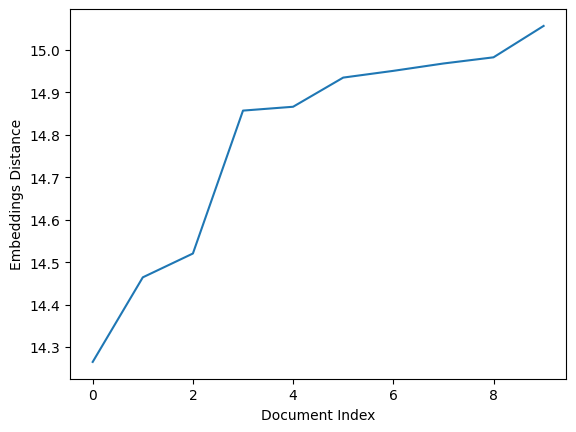

In [11]:
# Graph the embeddings distances, label both axes
import matplotlib.pyplot as plt

plt.plot(results.distance)
plt.xlabel('Document Index')
plt.ylabel('Embeddings Distance')
plt.show()


## Extra credit, rerankers

We can use rerankers to improve the sorting of the search results. Further reading:

- Answer.AI's [rerankers, why and how](https://www.answer.ai/posts/2024-09-16-rerankers.html#introducing-rerankers-why-and-how)
- Sentence Transformers [reranking documentation](https://sbert.net/examples/applications/retrieve_rerank/README.html)

In [16]:
from sentence_transformers import CrossEncoder
reranking_model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

/Users/jackbravo/Documents/bixal/esc-ai-chat/byaldi-colpali-pdf/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
texts = results.text.tolist()
ranks = reranking_model.rank(text_query, texts)
ranks

[{'corpus_id': 0, 'score': 3.8207016},
 {'corpus_id': 6, 'score': 1.5085411},
 {'corpus_id': 1, 'score': 1.2419469},
 {'corpus_id': 3, 'score': 1.1873164},
 {'corpus_id': 4, 'score': 0.24511442},
 {'corpus_id': 2, 'score': -0.967309},
 {'corpus_id': 5, 'score': -2.422687},
 {'corpus_id': 7, 'score': -4.343476},
 {'corpus_id': 8, 'score': -4.657504},
 {'corpus_id': 9, 'score': -5.7956524}]

In [18]:
# Create a dictionary mapping corpus_id to score
score_dict = {item['corpus_id']: item['score'] for item in ranks}

# Add the new scores to the dataframe
results['rerank_score'] = results.index.map(score_dict)

# Sort the dataframe by the new scores in descending order
rag_results_reranked = results.sort_values('rerank_score', ascending=False)
rag_results_reranked

,idx,distance,text,rerank_score
0,25,13.010966,**Crime Prevention and Justice Reform. Crime p...,3.820702
6,24,15.367569,"**Youth Participation, Empowerment, and Develo...",1.508541
1,11,13.462914,The CARICOM Secretariat Strategic Plan 2022-20...,1.241947
3,12,14.674122,### CARICOM SECRETARIAT STRATEGIC\n FRAMEWORK ...,1.187316
4,0,15.032048,###### CARICOM SECRETARIAT\n STRATEGIC PLAN,0.245114
2,6,14.636911,## FOREWORD\n\nThe Secretariat’s strategy to a...,-0.967309
5,19,15.320809,"In addition to these measures, the CSMT’s stra...",-2.422687
7,22,15.581043,Strategies and priority actions will focus on ...,-4.343476
8,14,15.760194,The Secretariat will work closely with Member ...,-4.657504
9,1,15.956948,"# 2022-2030\n\nCARICOM Secretariat, Turkeyen, ...",-5.795652
